In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The pre-class assignment quiz must be submitted on D2L on or before **_11:59pm on on the day before class_**.  Students must come to class the next day prepared to discuss the material covered in this assignment.

# 07 Pre-Class Assignment: Inverse and Transformation Matrices

### Readings for this topic (Recommended in bold)
 * [Heffron Chapter 3.IV pg 241-243](http://joshua.smcvt.edu/linearalgebra/book.pdf)
 * [Beezer Subsection EM pg 340-345](http://linear.ups.edu/download/fcla-3.50-tablet.pdf)
 * [Boyd Sections 11.1 and 11.2, pg 199-206](http://vmls-book.stanford.edu/vmls.pdf)


---
### Assignment Overview 

1. [The Inverse Matrix](#Inverse_Matrix)
1. [Transformation Matrix](#Transformation_Matrix)

----
<a name="Inverse_Matrix"></a>
## 1. The Inverse Matrix (aka $A^{-1}$)



For some (not all) **square** matrices $A$, there exists a special matrix called the Inverse Matrix, which is typically written as $A^{-1}$ and when multiplied by $A$ results in the identity matrix $I$:

$$ A^{-1}A = AA^{-1} = I. $$

Note that this is defined only for **square** matrices and thus, the matrices $A$, $A^{-1}$, and $I$ above all have the same size. 

Some properties of an Inverse Matrix include:

1. $(A^{-1})^{-1} = A$
2. $(cA)^{-1} = \frac{1}{c}A^{-1}$
3. $(AB)^{-1} = B^{-1}A^{-1}$
4. $(A^n)^{-1} = (A^{-1})^n$
1. $(A^\top)^{-1} = (A^{-1})^\top$  here $A^\top$ is the tranpose of the matrix $A$.

If you know that $A^{-1}$ is an inverse matrix to $A$, then solving $Ax=b$ is simple, just multiply both sides of the equation by $A^{-1}$ (on the left) and you get:

$$A^{-1}Ax = A^{-1}b$$

If we apply the definition of the inverse matrix from above we can reduce the equation to:

$$Ix = A^{-1}b$$

We know $I$ times $x$ is just $x$  (definition of the identity matrix), so this further reduces to:

$$x = A^{-1}b$$

To conclude, solving $Ax=b$ when you know $A^{-1}$ is really simple.  All you need to do is multiply $A^{-1}$ by $b$ and you know $x$.

&#9989;  **<font color=red>DO THIS:</font>** Find a Python numpy command that will calculate the inverse of a matrix and use it invert the following matrix ```A```.  Store the inverse in a new matirx named ```A_inv```

In [1]:
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

A = np.matrix([[1, 2, 3], [4, 5, 6], [7,8,7]])

sym.Matrix(A)

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  7⎦

In [2]:
#put your answer to the above question here.
A_inv = np.linalg.inv(A)
sym.Matrix(A_inv)

⎡-2.16666666666667  1.66666666666667   -0.5⎤
⎢                                          ⎥
⎢2.33333333333333   -2.33333333333333  1.0 ⎥
⎢                                          ⎥
⎣      -0.5                1.0         -0.5⎦

Lets check your answer by multiplying ```A``` by ```A_inv```. 

In [3]:
sym.Matrix(A * A_inv)

⎡         1.0                    0.0                    0.0         ⎤
⎢                                                                   ⎥
⎢-8.88178419700125e-16           1.0           -4.44089209850063e-16⎥
⎢                                                                   ⎥
⎣4.44089209850063e-16   -4.44089209850063e-16           1.0         ⎦

In [4]:
np.allclose(A*A_inv, [[1,0,0],[0,1,0],[0,0,1]])

True

&#9989;  **<font color=red>QUESTION:</font>** What function did you use to find the inverse of matrix $A$?

**numply.linalg.inv()**

&#9989;  **<font color=red>DO THIS:</font>** Now, consider the following matrix ```B```. Try to find its inverse. Explain why you are getting the result you are getting.

In [5]:
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

B = np.matrix([[1, 2, 3], [4, 5, 6], [2,4,6]])

sym.Matrix(B)

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣2  4  6⎦

In [6]:
# Try to find the inverse of B in this cell
B_inv = np.linalg.inv(B)
sym.Matrix(B_inv)

LinAlgError: Singular matrix

**In this cell explain your result.**

### How do we create an inverse matrix?

From previous assignments, we learned that we could string together a bunch of Elementary Row Operations to get matrix ($A$) into its Reduced Row Echelon form. We later discussed that each Elementary Row Operation can be represented by a multiplication by an Elementary matrix. Thus, the Gauss-Jordan Elimination (using Elementary Row Operations) can be represented as multiplication by a number of Elementary Matrices as follows:

$$ E_n \dots E_3 E_2 E_1 A = RREF $$

If $A$ reduces to the identity matrix (i.e. $A$ is row equivalent to $I$), then $A$ has an inverse and its inverse is just all of the Elementary Matrices multiplied together:

$$ A^{-1} = E_n \dots E_3 E_2 E_1 $$

Consider the following matrix.  
$$
A = \left[
\begin{matrix}
    1 & 2 \\ 
    4 & 6 
\end{matrix}
\right] 
$$



In [7]:
A = np.matrix([[1, 2], [4,6]])

It can be reduced into an identity matrix using the following elementary operators

| Words | Elementary Matrix|
|:---:|:---:|
| Adding -4 times row 1 to row 2. | $$E_1 = \left[\begin{matrix}1 & 0 \\ -4 & 1 \end{matrix}\right]$$ |
|Adding row 2 to row 1. |$$
E_2 = \left[
\begin{matrix}
    1 & 1 \\ 
    0 & 1 
\end{matrix}
\right] $$ |
| Multiplying row 2 by $-\frac{1}{2}$.| $$
E_3 = 
\left[
\begin{matrix}
    1 & 0 \\ 
    0 & -\frac{1}{2} 
\end{matrix}
\right]
$$ |

In [8]:
E1 = np.matrix([[1,0], [-4,1]])
E2 = np.matrix([[1,1], [0,1]])
E3 = np.matrix([[1,0],[0,-1/2]])

We can just check that the statment seems to be true by multiplying everything out.

In [9]:
E3*E2*E1*A

matrix([[1., 0.],
        [0., 1.]])

&#9989;  **<font color=red>DO THIS:</font>** Combine the above elementary Matrices to make an inverse matrix named ```A_inv```

In [10]:
# Put your answer to the above question here.
A_inv = E3*E2*E1
sym.Matrix(A_inv)

⎡-3.0  1.0 ⎤
⎢          ⎥
⎣2.0   -0.5⎦

&#9989;  **<font color=red>DO THIS:</font>** Verify that ``A_inv`` is an actual inverse and check that $A^{-1}A = I$ and $AA^{-1} = I$.

In [11]:
# Put your code here.
I = np.matrix([[1,0],[0,1]])
A*A_inv == I
A_inv*A == I

matrix([[ True,  True],
        [ True,  True]])

&#9989;  **<font color=red>QUESTION:</font>**   Is an invertible matrix is always square? Why or why not?

**Put your answer to the above question here.**

&#9989;  **<font color=red>QUESTION:</font>**  Is a square matrix always invertible? Why or why not?

**Put your answer to the above question here.**

&#9989;  **<font color=red>QUESTION:</font>** Describe the Reduced Row Echelon form of a square, invertible matrix.

**Put your answer to the above question here.**

&#9989;  **<font color=red>QUESTION:</font>** Is the following matrix in the Reduced Row Echelon form? 

$$
\left[
\begin{matrix}
    1 & 2 & 0 & 3 & 0 & 4 \\ 
    0 & 0 & 1 & 3 & 0 & 7 \\ 
    0 & 0 & 0 & 0 & 1 & 6 \\ 
    0 & 0 & 0 & 0 & 0 & 0  
\end{matrix}
\right]
$$

**Put your answer to the above question here.**

&#9989;  **<font color=red>QUESTION:</font>** If the matrix shown above is not in Reduced Row Echelon form. Name a rule that is violated?

**Put your answer to the above question here.**

&#9989;  **<font color=red>QUESTION:</font>** What is the size of the matrix described in the previous QUESTION?

- $4 \times 6$
- $6 \times 4$
- $3 \times 6$
- $5 \times 3$


**Put your answer to the above question here.**

&#9989;  **<font color=red>QUESTION:</font>**  Describe the elementary row operation that is implemented by the following matrix


$$
\left[
\begin{matrix}
    0 & 1 & 0 \\ 
    1 & 0 & 0 \\ 
    0 & 0 & 1 
\end{matrix}
\right]
$$

**Put your answer to the above question here.**

----
<a name="Transformation_Matrix"></a>
## 2. Transformation Matrix

Consider the following set of points:

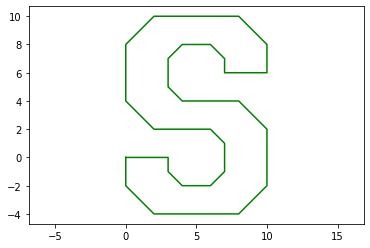

In [7]:
%matplotlib inline
import matplotlib.pylab as plt

x = [0.0,  0.0,  2.0,  8.0, 10.0, 10.0, 8.0, 4.0, 3.0, 3.0, 4.0, 6.0, 7.0, 7.0, 10.0, 
     10.0,  8.0,  2.0, 0.0, 0.0, 2.0, 6.0, 7.0,  7.0,  6.0,  4.0,  3.0, 3.0, 0.0]
y = [0.0, -2.0, -4.0, -4.0, -2.0,  2.0, 4.0, 4.0, 5.0, 7.0, 8.0, 8.0, 7.0, 6.0,  6.0,
     8.0, 10.0, 10.0, 8.0, 4.0, 2.0, 2.0, 1.0, -1.0, -2.0, -2.0, -1.0, 0.0, 0.0]

plt.plot(x,y, color='green');
plt.axis('equal');


We can rotate these points around the origin by using the following simple set of equations:

$$ x \cos(\theta) - y \sin(\theta) = x_{rotated} $$
$$ x \sin(\theta) + y \cos(\theta) = y_{rotated} $$

This can be rewritten as the following system of matrices:

$$
\left[
\begin{matrix}
    \cos(\theta) & -\sin(\theta) \\ 
    \sin(\theta) & \cos(\theta)
\end{matrix}
\right] 
\left[
\begin{matrix}
    x \\
    y
\end{matrix}
\right] 
=
\left[
\begin{matrix}
    x_{rotated}\\ 
    y_{rotated}
\end{matrix}
\right]
$$

We can rotate the points around the origin by $\pi/4$ (i.e. $45^o$} as follows: 

In [8]:
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrices look nice in jupyter

points = np.matrix([x,y])

In [9]:
angle = np.pi/4
R = np.matrix([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]);
sym.Matrix(R)

⎡0.707106781186548  -0.707106781186548⎤
⎢                                     ⎥
⎣0.707106781186548  0.707106781186548 ⎦

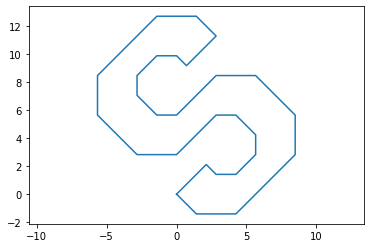

In [10]:
p=R*points

plt.plot(p[0].T,p[1].T);
plt.axis('equal');


We can even have a little fun and keep applying the same rotation over and over again. 

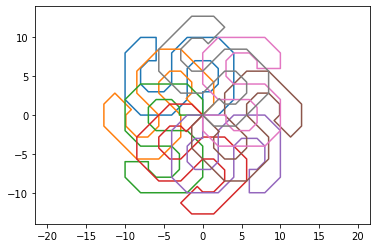

In [11]:
# Apply R and plot 8 times
for i in range(0,8):
    p = R * p
    plt.plot(p[0].T,p[1].T);

plt.axis('equal');

&#9989;  **<font color=red>QUESTION:</font>** In the above code what does the ```T``` call in ```p[0].T``` do?

**Put your answer here.**

----
Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.